In [17]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [137]:
pathX_geo = "/Users/phuonglh/vlp/s2s/dat/geo.80-99.csv"

In [138]:
pathX_slp = "/Users/phuonglh/vlp/s2s/dat/slp.80-99.csv"

In [27]:
pathY = "/Users/phuonglh/vlp/s2s/dat/y.80-99.tsv"

In [91]:
dfY = pd.read_csv(pathY, delimiter="\t", header=None)

/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (5,7,19,21,27,31,34,36,37,38,39,48,52,54,57,58,59,66,72,77,78,79,82,84,85,93,94,96,99,105,112,113,114,116,117,119,121,123,127,130,135,138,139,141,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.4
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,1999,12,27,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0.0
7301,1999,12,28,0,0.0,0.0,0.0,0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0.0
7302,1999,12,29,0,0.0,0.0,0.0,0,0.0,0,...,0.8,0,0.0,0.0,0.0,0.1,0,0,0.1,0.0
7303,1999,12,30,0,0.0,0.0,0.1,0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,3,0,0,10.8


In [93]:
dfY['MuongTe'] = pd.to_numeric(dfY.loc[:,3])

In [94]:
dfY['Date'] = dfY.loc[:, 0:2].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dfY['Date'] = pd.to_datetime(dfY['Date'])

In [95]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,MuongTe,Date
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,1999,12,27,0.0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,1999-12-27
7301,1999,12,28,0.0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,1999-12-28
7302,1999,12,29,0.0,0.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.1,0,0,0.1,0.0,0.0,1999-12-29
7303,1999,12,30,0.0,0.0,0.0,0.1,0,0.0,0,...,0.0,0.0,0.0,0.0,3,0,0,10.8,0.0,1999-12-30


In [139]:
dfX_geo = pd.read_csv(pathX_geo)

In [145]:
dfX_geo

,H850,H500
0,1501.00,5789.00
1,1503.75,5805.00
2,1507.75,5818.00
3,1528.75,5826.75
4,1514.00,5817.25
...,...,...
7300,1536.00,5813.50
7301,1538.00,5806.50
7302,1508.00,5776.25
7303,1503.00,5800.00


In [151]:
dfX_slp = pd.read_csv(pathX_slp)

In [152]:
dfX_slp

,SLP
0,101440.0
1,101400.0
2,101428.0
3,101723.0
4,101555.0
...,...
7300,102175.0
7301,102187.0
7302,101717.0
7303,101537.0


In [153]:
df = pd.concat([dfX_geo, dfX_slp, dfY['MuongTe'], dfY['Date']], axis=1)

In [154]:
df

,H850,H500,SLP,MuongTe,Date
0,1501.00,5789.00,101440.0,0.0,1980-01-01
1,1503.75,5805.00,101400.0,0.0,1980-01-02
2,1507.75,5818.00,101428.0,0.0,1980-01-03
3,1528.75,5826.75,101723.0,0.0,1980-01-04
4,1514.00,5817.25,101555.0,0.0,1980-01-05
...,...,...,...,...,...
7300,1536.00,5813.50,102175.0,0.0,1999-12-27
7301,1538.00,5806.50,102187.0,0.0,1999-12-28
7302,1508.00,5776.25,101717.0,0.0,1999-12-29
7303,1503.00,5800.00,101537.0,0.0,1999-12-30


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   H850     7305 non-null   float64       
 1   H500     7305 non-null   float64       
 2   MuongTe  7305 non-null   float64       
 3   Date     7305 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 228.4 KB


In [155]:
train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='MuongTe', extra_feature_col=['H850', 'H500', 'SLP'], with_split=True, val_ratio=0.1, test_ratio=0.1)

In [156]:
train.df

,H850,H500,SLP,MuongTe,Date,id
0,1501.00,5789.00,101440.0,0.0,1980-01-01,0
1,1503.75,5805.00,101400.0,0.0,1980-01-02,0
2,1507.75,5818.00,101428.0,0.0,1980-01-03,0
3,1528.75,5826.75,101723.0,0.0,1980-01-04,0
4,1514.00,5817.25,101555.0,0.0,1980-01-05,0
...,...,...,...,...,...,...
5840,1579.25,5809.25,102700.0,0.0,1995-12-28,0
5841,1551.50,5768.25,102465.0,0.0,1995-12-29,0
5842,1543.00,5760.25,102310.0,0.0,1995-12-30,0
5843,1551.25,5775.50,102375.0,0.0,1995-12-31,0


In [157]:
valid.df

,H850,H500,SLP,MuongTe,Date,id
5845,1551.25,5799.75,102153.0,0.0,1996-01-02,0
5846,1547.25,5804.25,102208.0,0.0,1996-01-03,0
5847,1513.00,5778.00,101693.0,0.0,1996-01-04,0
5848,1506.75,5776.00,101548.0,0.0,1996-01-05,0
5849,1520.75,5794.00,101695.0,0.0,1996-01-06,0
...,...,...,...,...,...,...
6570,1539.75,5843.00,101837.0,0.0,1997-12-27,0
6571,1534.50,5846.25,101797.0,0.1,1997-12-28,0
6572,1529.25,5860.75,101697.0,0.0,1997-12-29,0
6573,1524.00,5864.50,101640.0,0.0,1997-12-30,0


In [158]:
test.df

,H850,H500,SLP,MuongTe,Date,id
6575,1514.75,5845.25,101535.0,0.0,1998-01-01,0
6576,1517.00,5852.50,101547.0,0.0,1998-01-02,0
6577,1523.25,5846.00,101565.0,0.0,1998-01-03,0
6578,1544.00,5843.50,101835.0,0.0,1998-01-04,0
6579,1531.25,5838.50,101832.0,0.0,1998-01-05,0
...,...,...,...,...,...,...
7300,1536.00,5813.50,102175.0,0.0,1999-12-27,0
7301,1538.00,5806.50,102187.0,0.0,1999-12-28,0
7302,1508.00,5776.25,101717.0,0.0,1999-12-29,0
7303,1503.00,5800.00,101537.0,0.0,1999-12-30,0


In [159]:
lookback, horizon = 7, 1

In [160]:
scaler = StandardScaler()
for data in [train, valid, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [161]:
train.df

,H850,H500,SLP,MuongTe,Date,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,0.133672,-1.520928,0.388783,-0.413515,1980-01-01,0,-1.673261,-1.726722,-1.0,-1.698983,-1.600963,-1.626711,-0.632456
1,0.215845,-1.044643,0.313846,-0.413515,1980-01-02,0,-1.559643,-1.717239,-0.5,-1.698983,-1.600963,-1.626711,-0.632456
2,0.335369,-0.657662,0.366302,-0.413515,1980-01-03,0,-1.446025,-1.707757,0.0,-1.698983,-1.600963,-1.626711,-0.632456
3,0.962870,-0.397194,0.918961,-0.413515,1980-01-04,0,-1.332408,-1.698274,0.5,-1.698983,-1.600963,-1.626711,-0.632456
4,0.522125,-0.679988,0.604226,-0.413515,1980-01-05,0,-1.218790,-1.688792,1.0,-1.698983,-1.600963,-1.626711,1.581139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2.471862,-0.918130,2.749290,-0.413515,1995-12-28,0,1.394416,1.696490,0.0,1.686343,1.588215,1.626526,-0.632456
5841,1.642664,-2.138610,2.309037,-0.413515,1995-12-29,0,1.508034,1.705972,0.5,1.686343,1.588215,1.626526,-0.632456
5842,1.388675,-2.376752,2.018657,-0.413515,1995-12-30,0,1.621652,1.715455,1.0,1.686343,1.588215,1.626526,1.581139
5843,1.635193,-1.922793,2.140429,-0.413515,1995-12-31,0,1.735269,1.724937,1.5,1.686343,1.588215,1.626526,1.581139


In [162]:
valid.df

,H850,H500,SLP,MuongTe,Date,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,1.635193,-1.200924,1.724530,-0.413515,1996-01-02,0,-1.559643,-1.717239,-1.0,-1.698983,-1.600963,1.843408,-0.632456
1,1.515669,-1.066969,1.827568,-0.413515,1996-01-03,0,-1.446025,-1.707757,-0.5,-1.698983,-1.600963,1.843408,-0.632456
2,0.492244,-1.848374,0.862758,-0.413515,1996-01-04,0,-1.332408,-1.698274,0.0,-1.698983,-1.600963,1.843408,-0.632456
3,0.305488,-1.907909,0.591112,-0.413515,1996-01-05,0,-1.218790,-1.688792,0.5,-1.698983,-1.600963,1.843408,-0.632456
4,0.723822,-1.372089,0.866505,-0.413515,1996-01-06,0,-1.105172,-1.679309,1.0,-1.698983,-1.600963,1.843408,1.581139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.291562,0.086533,1.132530,-0.413515,1997-12-27,0,1.280799,1.687007,1.0,1.686343,1.588215,2.060290,1.581139
726,1.134686,0.183278,1.057594,-0.406681,1997-12-28,0,1.394416,1.696490,1.5,1.686343,1.588215,2.060290,1.581139
727,0.977811,0.614911,0.870252,-0.413515,1997-12-29,0,1.508034,1.705972,-1.5,-1.698983,1.588215,2.060290,-0.632456
728,0.820936,0.726540,0.763467,-0.413515,1997-12-30,0,1.621652,1.715455,-1.0,-1.698983,1.588215,2.060290,-0.632456


In [163]:
test.df

,H850,H500,SLP,MuongTe,Date,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,0.544536,0.153510,0.566758,-0.413515,1998-01-01,0,-1.673261,-1.726722,0.0,-1.698983,-1.600963,2.277173,-0.632456
1,0.611768,0.369327,0.589239,-0.413515,1998-01-02,0,-1.559643,-1.717239,0.5,-1.698983,-1.600963,2.277173,-0.632456
2,0.798525,0.175836,0.622960,-0.413515,1998-01-03,0,-1.446025,-1.707757,1.0,-1.698983,-1.600963,2.277173,1.581139
3,1.418556,0.101417,1.128783,-0.413515,1998-01-04,0,-1.332408,-1.698274,1.5,-1.698983,-1.600963,2.277173,1.581139
4,1.037573,-0.047422,1.123163,-0.413515,1998-01-05,0,-1.218790,-1.688792,-1.5,-1.632604,-1.600963,2.277173,-0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.179508,-0.791617,1.765746,-0.413515,1999-12-27,0,1.280799,1.687007,-1.5,1.686343,1.588215,2.494055,-0.632456
726,1.239270,-0.999992,1.788227,-0.413515,1999-12-28,0,1.394416,1.696490,-1.0,1.686343,1.588215,2.494055,-0.632456
727,0.342839,-1.900467,0.907720,-0.413515,1999-12-29,0,1.508034,1.705972,-0.5,1.686343,1.588215,2.494055,-0.632456
728,0.193434,-1.193482,0.570505,-0.413515,1999-12-30,0,1.621652,1.715455,0.0,1.686343,1.588215,2.494055,-0.632456


In [164]:
X, y = train.to_numpy()

In [165]:
X.shape, y.shape

((5838, 7, 11), (5838, 1, 1))

In [166]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster
tcn = TCNForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], seed=1)                           

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [167]:
tcn.fit((X, y), epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 4.9 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [179]:
tcn.evaluate((X_test, y_test))

[array([[2.29569721]])]

In [168]:
X_test, y_test = test.to_numpy()

In [170]:
prediction_tcn = tcn.predict(X_test)

In [171]:
p1, t = test.unscale_numpy(prediction_tcn), test.unscale_numpy(y_test)

In [121]:
import matplotlib.pyplot as plt

In [172]:
p1.shape

(723, 1, 1)

Text(0, 0.5, 'Precipitation')

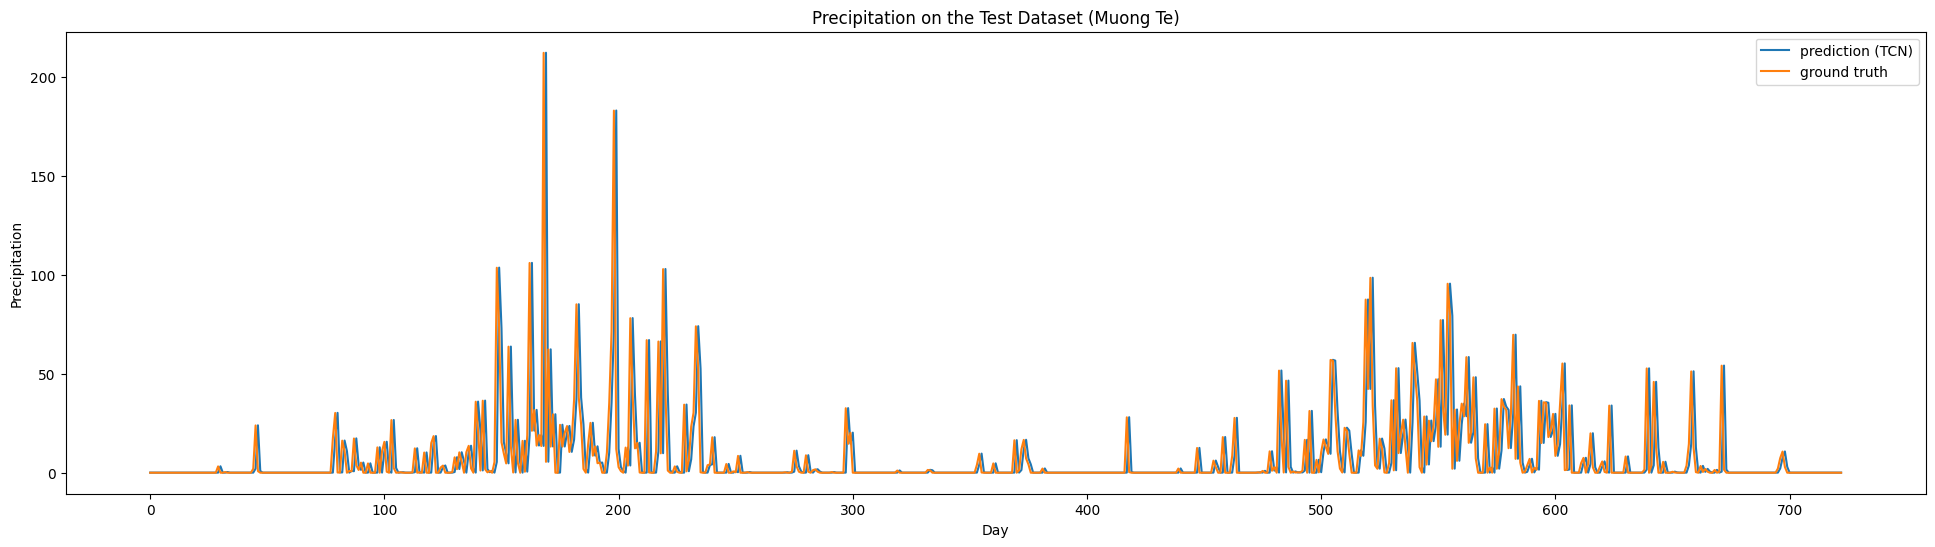

In [175]:
plt.figure(figsize=(24,6))
plt.plot(p1[:,:,0])
plt.plot(t[:,:,0])
plt.legend(["prediction (TCN)", "ground truth"])
plt.title('Precipitation on the Test Dataset (Muong Te)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

In [127]:
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster

In [209]:
# LSTMForecaster only supports 1-step prediction
lstm = LSTMForecaster(past_seq_len=lookback, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], hidden_dim=32, layer_num=2, optimizer='Adam', loss='mse', lr=1e-3)

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [210]:
lstm.fit((X, y), epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 14.2 K
1 | loss  | MSELoss          | 0     
-------------------------------------------
14.2 K    Trainable params
0         Non-trainable params
14.2 K    Total params
0.057     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [211]:
lstm.evaluate((X_test, y_test))

[array([[1.59875679]])]

In [212]:
prediction_lstm = lstm.predict(X_test)

In [213]:
p2 = test.unscale_numpy(prediction_lstm)

Text(0, 0.5, 'Precipitation')

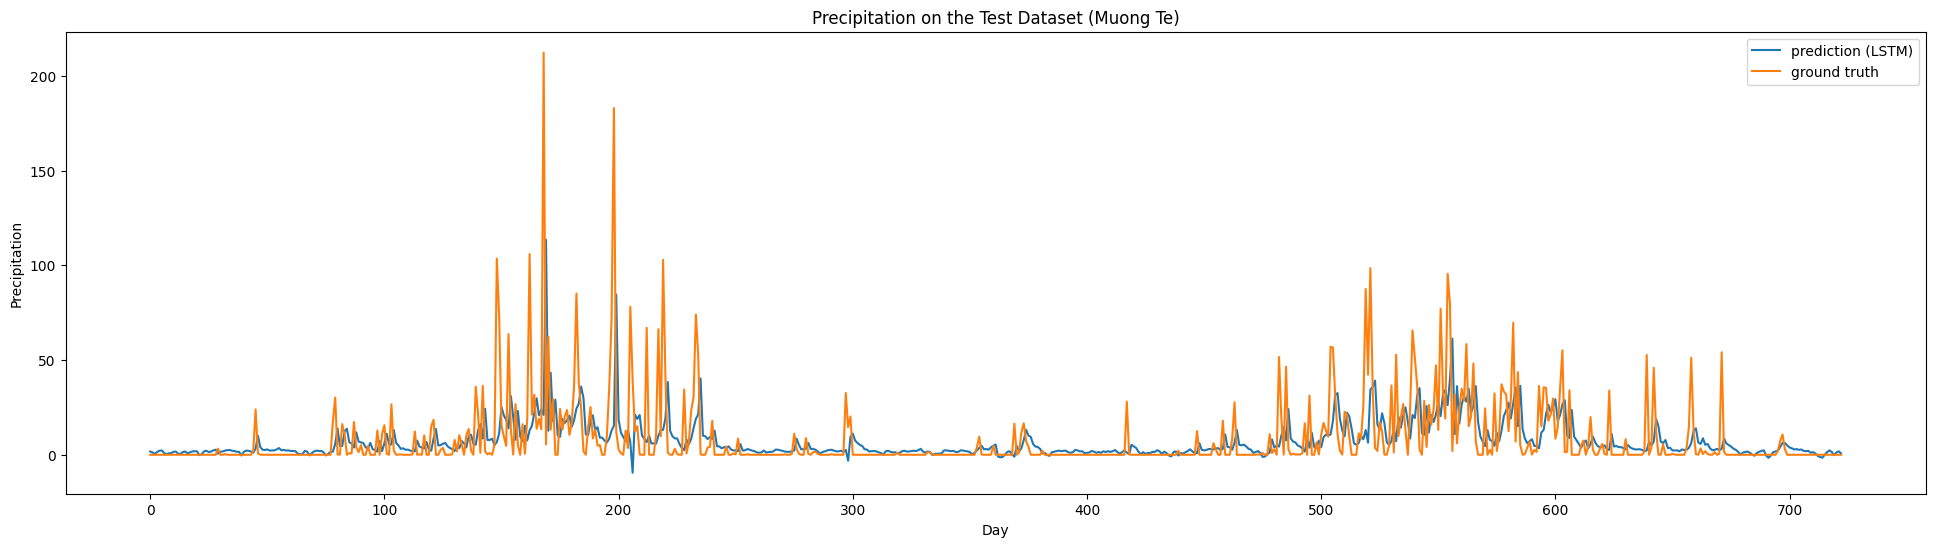

In [214]:
plt.figure(figsize=(24,6))
plt.plot(p2[:,:,0])
plt.plot(t[:,:,0])
plt.legend(["prediction (LSTM)", "ground truth"])
plt.title('Precipitation on the Test Dataset (Muong Te)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

Text(0, 0.5, 'Precipitation')

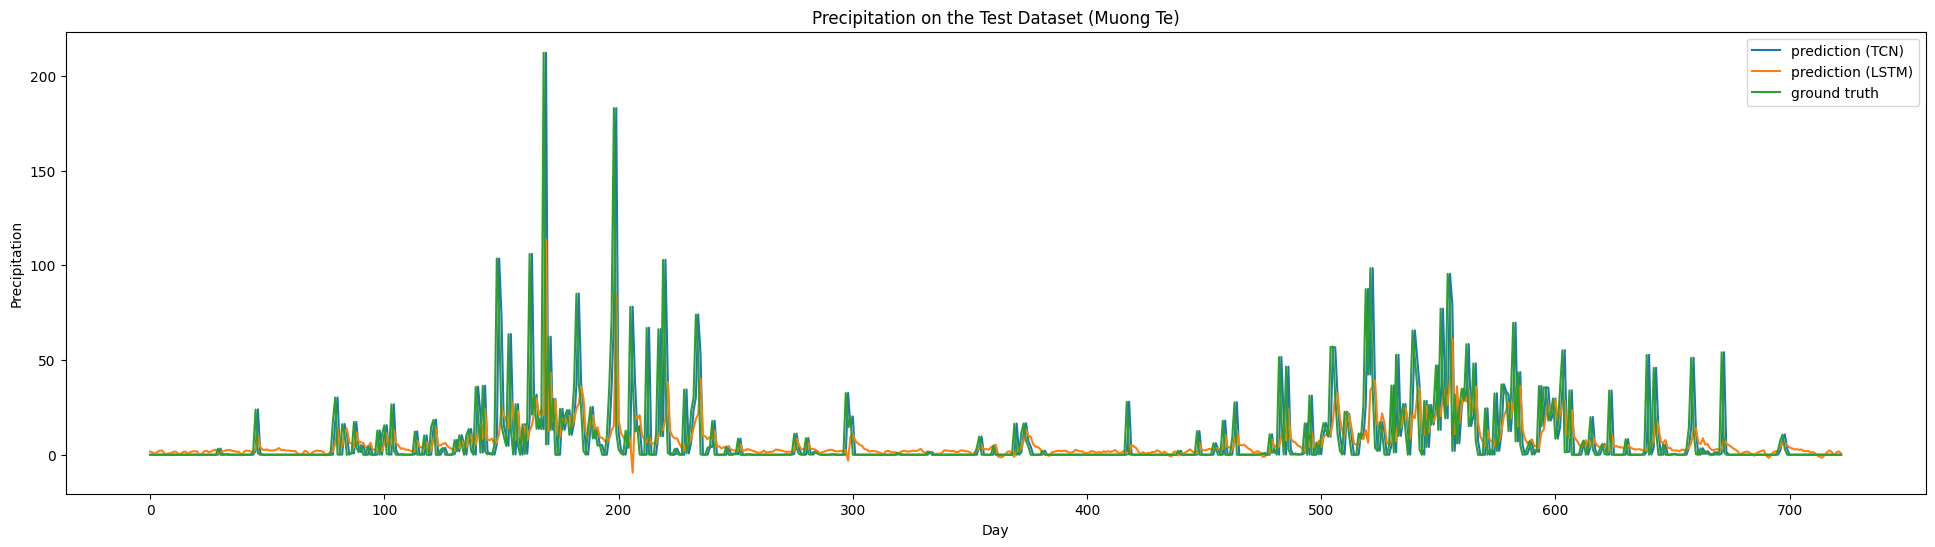

In [215]:
plt.figure(figsize=(24,6))
plt.plot(p1[:,:,0])
plt.plot(p2[:,:,0])
plt.plot(t[:,:,0])
plt.legend(["prediction (TCN)", "prediction (LSTM)", "ground truth"])
plt.title('Precipitation on the Test Dataset (Muong Te)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

In [216]:
from bigdl.chronos.forecaster.seq2seq_forecaster import Seq2SeqForecaster

In [217]:
seq2seq = Seq2SeqForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], lstm_hidden_dim=64, lstm_layer_num=2, 
                            optimizer='Adam', loss='mse', lr=1e-3)

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [218]:
seq2seq.fit((X, y), epochs=5)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 103 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
103 K     Trainable params
0         Non-trainable params
103 K     Total params
0.414     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [219]:
seq2seq.evaluate((X_test, y_test))

[array([[1.59604084]])]

In [220]:
prediction_seq2seq = seq2seq.predict(X_test)

In [222]:
p3 = test.unscale_numpy(prediction_seq2seq)

Text(0, 0.5, 'Precipitation')

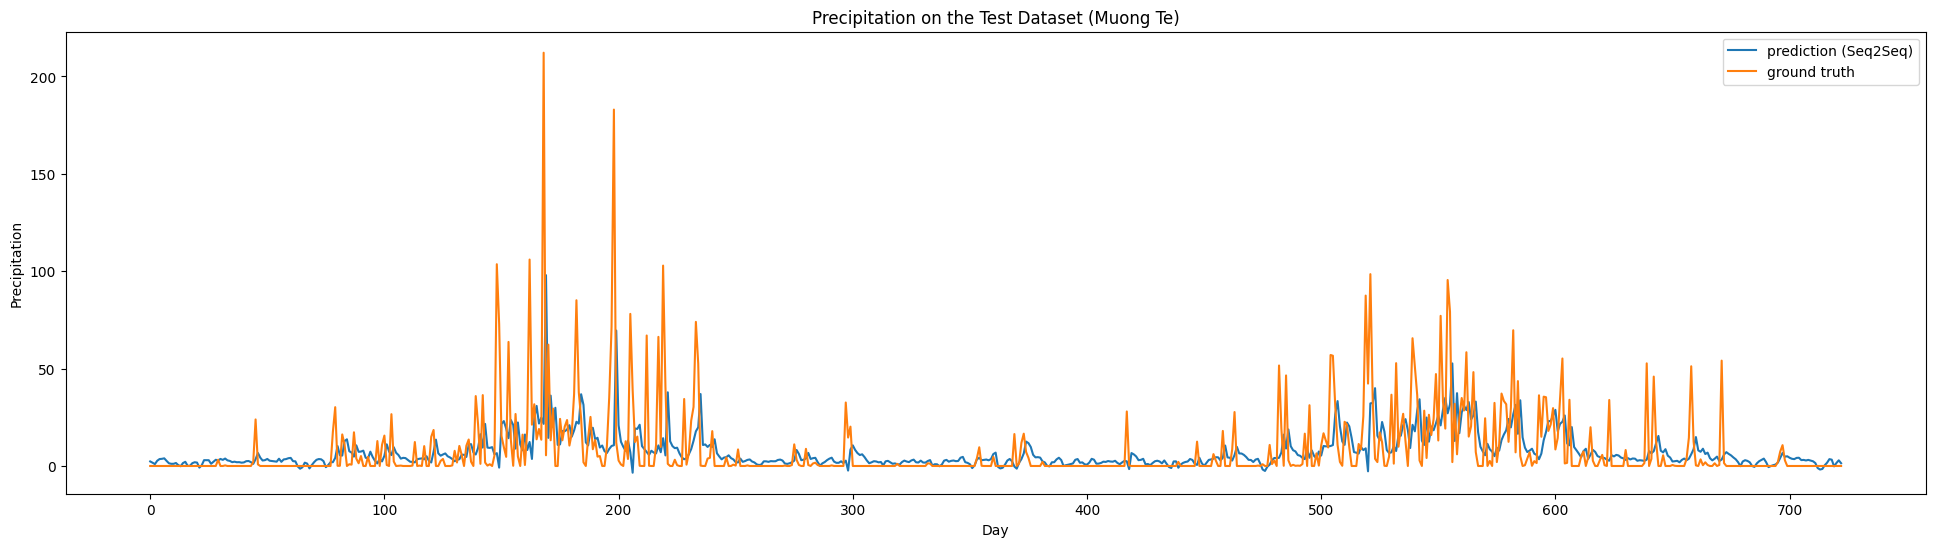

In [230]:
plt.figure(figsize=(24,6))
plt.plot(p3[:,:,0][:,-1])
plt.plot(t[:,:,0][:,-1])
plt.legend(["prediction (Seq2Seq)", "ground truth"])
plt.title('Precipitation on the Test Dataset (Muong Te)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

Text(0, 0.5, 'Precipitation')

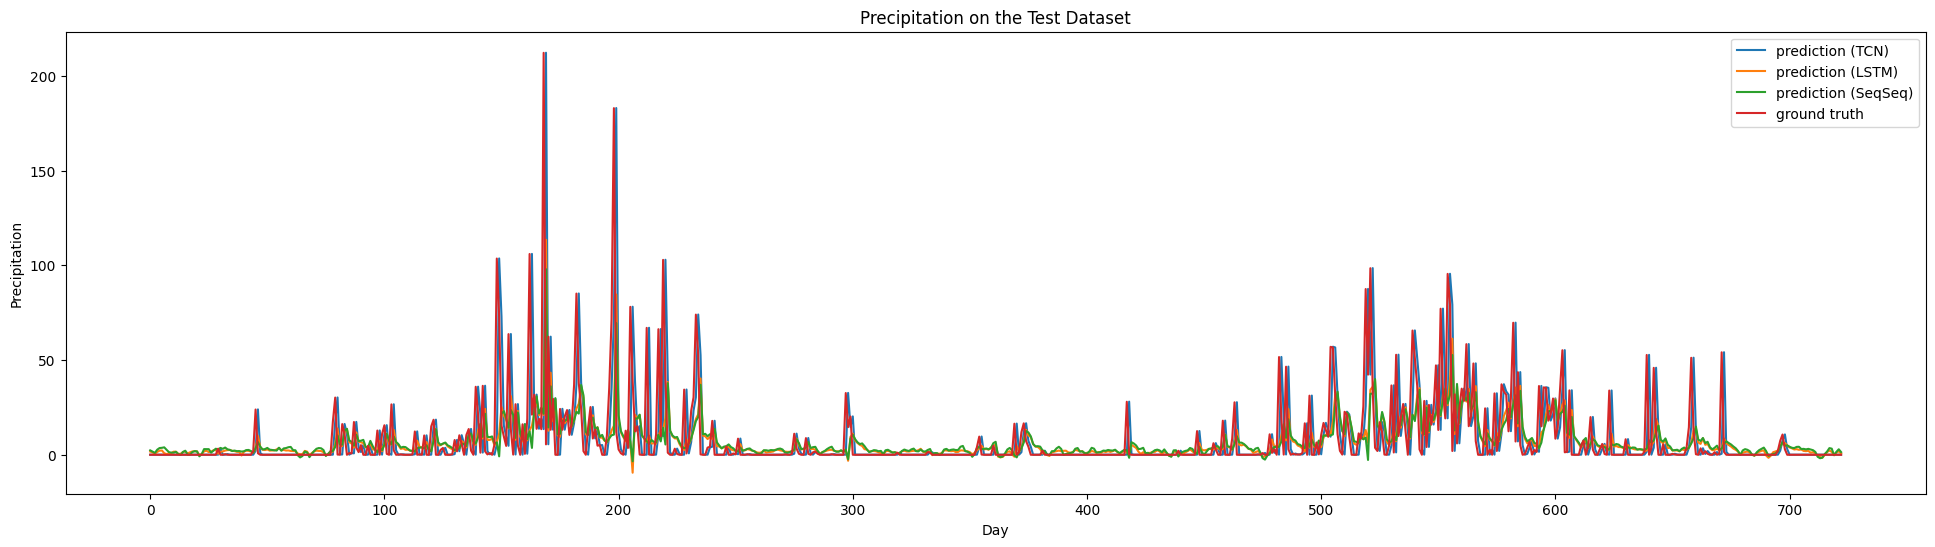

In [235]:
plt.figure(figsize=(24,6))
plt.plot(p1[:,:,0])
plt.plot(p2[:,:,0])
plt.plot(p3[:,:,0][:,-1])
plt.plot(t[:,:,0])
plt.legend(["prediction (TCN)", "prediction (LSTM)", "prediction (SeqSeq)", "ground truth"])
plt.title('Precipitation on the Test Dataset')
plt.xlabel('Day')
plt.ylabel('Precipitation')